# Shipping Cost Minimization Example

Minimizing the total cost of shipping from multiple points to multiple points. The objective is to minimize the total cost of shipping the same product from multiple factories to multiple stores. Shipping cost are different from each factory to each store. Each store needs a different quantity of the product and each factory has a different amount of the product available for shipping. This problem assumes that the only cost differences are the per unit shipping costs between the factories and the stores. 						


**Problem:**


A company manufactures its own products at its 3 factories and then delivers these products at its own 5 stores. Each of the stores orders a different amount of the product from the factories while each of the factories has a different amount of the product available to ship to the stores. Shipping costs per unit of products are different between each factory and each store. An optimal amount of products to ship from each factory to each store in order to minimize total shipping costs while fulfilling each store's order must be achieved.

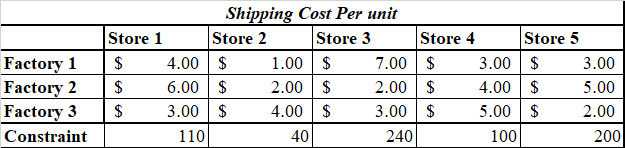
						
						

In [6]:
from pulp import *

#Create a problem
prob=LpProblem("Shipping cost Minimization", LpMinimize)

#Create the variables:
F1S1=LpVariable("Units shipped from Factory 1 to Store 1",0,None,LpInteger)
F1S2=LpVariable("Units shipped from Factory 1 to Store 2",0,None,LpInteger)
F1S3=LpVariable("Units shipped from Factory 1 to Store 3",0,None,LpInteger)
F1S4=LpVariable("Units shipped from Factory 1 to Store 4",0,None,LpInteger)
F1S5=LpVariable("Units shipped from Factory 1 to Store 5",0,None,LpInteger)

F2S1=LpVariable("Units shipped from Factory 2 to Store 1",0,None,LpInteger)
F2S2=LpVariable("Units shipped from Factory 2 to Store 2",0,None,LpInteger)
F2S3=LpVariable("Units shipped from Factory 2 to Store 3",0,None,LpInteger)
F2S4=LpVariable("Units shipped from Factory 2 to Store 4",0,None,LpInteger)
F2S5=LpVariable("Units shipped from Factory 2 to Store 5",0,None,LpInteger)

F3S1=LpVariable("Units shipped from Factory 3 to Store 1",0,None,LpInteger)
F3S2=LpVariable("Units shipped from Factory 3 to Store 2",0,None,LpInteger)
F3S3=LpVariable("Units shipped from Factory 3 to Store 3",0,None,LpInteger)
F3S4=LpVariable("Units shipped from Factory 3 to Store 4",0,None,LpInteger)
F3S5=LpVariable("Units shipped from Factory 3 to Store 5",0,None,LpInteger)

F=[[F1S1,F1S2,F1S3,F1S4,F1S5],
   [F2S1,F2S2,F2S3,F2S4,F2S5],
   [F3S1,F3S2,F3S3,F3S4,F3S5]]

#Information
cost=[[4.0,1.0,7.0,3.0],
      [6.0,2.0,2.0,4.0],
      [3.0,4.0,3.0,5.0,2.0]]

constraints=[110,40,240,100,200]

#Add the objective function
objective=(F[0][0]*cost[0][0]+F[0][1]*cost[0][1]+F[0][2]*cost[0][2]+F[0][3]*cost[0][3]+F[0][4]*cost[0][4]+
           F[1][0]*cost[1][0]+F[1][1]*cost[1][1]+F[1][2]*cost[1][2]+F[1][3]*cost[1][3]+F[1][4]*cost[1][4]+
           F[2][0]*cost[2][0]+F[2][1]*cost[2][1]+F[2][2]*cost[2][2]+F[2][3]*cost[2][3]+F[2][4]*cost[2][4])
prob+=objective
#Add contstaints
for i in range(0,5):
    prob+=F[0][i]+F[1][i]+F[2][i]==constraints[i]
    
prob.solve()

print("Status=",LpStatus[prob.status])
print("")
for i in prob.variables():
    print(i.name,'',i.varValue)
print('')
print('Minimum cost =', value(prob.objective))

Status= Optimal

Units_shipped_from_Factory_1_to_Store_1  0.0
Units_shipped_from_Factory_1_to_Store_2  40.0
Units_shipped_from_Factory_1_to_Store_3  0.0
Units_shipped_from_Factory_1_to_Store_4  100.0
Units_shipped_from_Factory_1_to_Store_5  0.0
Units_shipped_from_Factory_2_to_Store_1  0.0
Units_shipped_from_Factory_2_to_Store_2  0.0
Units_shipped_from_Factory_2_to_Store_3  240.0
Units_shipped_from_Factory_2_to_Store_4  0.0
Units_shipped_from_Factory_2_to_Store_5  0.0
Units_shipped_from_Factory_3_to_Store_1  110.0
Units_shipped_from_Factory_3_to_Store_2  0.0
Units_shipped_from_Factory_3_to_Store_3  0.0
Units_shipped_from_Factory_3_to_Store_4  0.0
Units_shipped_from_Factory_3_to_Store_5  200.0

Minimum cost = 1550.0
